In [1]:
%load_ext autoreload
%autoreload 2
import numpy as np
import matplotlib.pyplot as plt
import sys
import coffea.util as util
import time
import json
import os
import copy
from hist import Hist
sys.path.append("../../analysisTools/")
import plotTools as ptools
import utils
import mplhep as hep
import utils
hep.style.use("CMS")
plt.rcParams['font.size'] = 16.0
from matplotlib.colors import Normalize, LogNorm
from copy import deepcopy
from tqdm import tqdm
from matplotlib.lines import Line2D
from matplotlib.patches import Patch

In [2]:
hcs = ptools.histContainer("signal_histos_cuts.coffea")
dfs = utils.get_dict_fromCutflow(hcs.load('cutflow'))
dfs['legend'] = dfs.apply(ptools.make_label,axis=1)
selected_signals = ["sig_2018_Mchi-10p5_dMchi-1p0_ctau-1",
                    "sig_2018_Mchi-11p0_dMchi-2p0_ctau-100",
                    "sig_2018_Mchi-52p5_dMchi-5p0_ctau-10",
                    "sig_2018_Mchi-77p0_dMchi-14p0_ctau-100"]
sigs_delta10_ct1 = ['sig_2018_Mchi-10p5_dMchi-1p0_ctau-1',
                    'sig_2018_Mchi-31p5_dMchi-3p0_ctau-1',
                    'sig_2018_Mchi-52p5_dMchi-5p0_ctau-1',
                    'sig_2018_Mchi-73p5_dMchi-7p0_ctau-1']
sigs_delta20_ct1 = ['sig_2018_Mchi-11p0_dMchi-2p0_ctau-1',
                    'sig_2018_Mchi-33p0_dMchi-6p0_ctau-1',
                    'sig_2018_Mchi-55p0_dMchi-10p0_ctau-1',
                    'sig_2018_Mchi-77p0_dMchi-14p0_ctau-1']
labels_delta10_ct1 = [dfs[dfs.name==s].legend.item() for s in sigs_delta10_ct1]
labels_delta20_ct1 = [dfs[dfs.name==s].legend.item() for s in sigs_delta20_ct1]

In [3]:
CUT = "cut1"
selection = {"cut":CUT}

In [4]:
hcs.hnames

['PFMET',
 'nJets',
 'nBjets_loose',
 'nBjets_med',
 'nBjets_tight',
 'gen_dR',
 'gen_MET',
 'gen_vxy1',
 'gen_vxy10',
 'gen_vxy100',
 'gen_leadpT',
 'gen_eeMETdPhi',
 'gen_jetMETdPhi',
 'gen_jetMETratio',
 'gen_lead_jet_pt',
 'gen_lead_jet_eta',
 'match_ele_dxy',
 'cutDesc',
 'cutflow',
 'cutflow_cts',
 'cutflow_nevts']

# 10% splitting

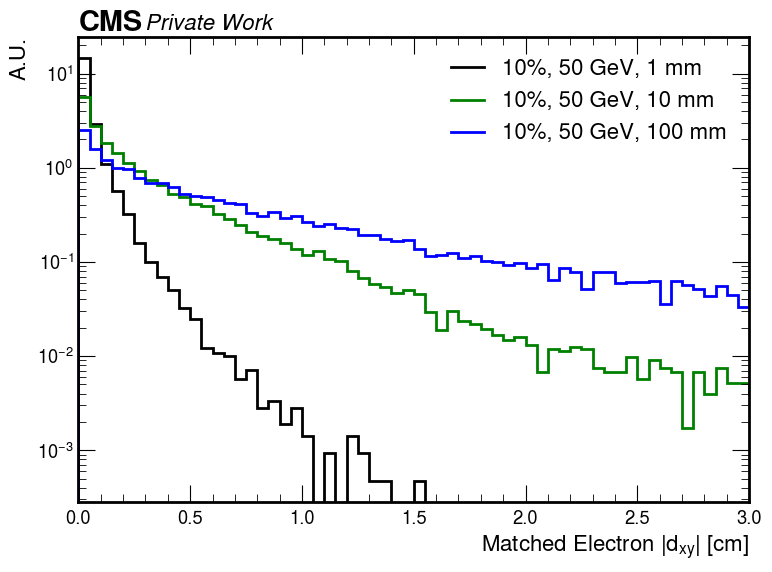

In [11]:
hname = "match_ele_dxy"
outD = "plots/sigOnly/"
xlabel = r"Matched Electron $|d_{xy}|$ [cm]"
title = None

sigs_delta10 = ['sig_2018_Mchi-52p5_dMchi-5p0_ctau-1',
                'sig_2018_Mchi-52p5_dMchi-5p0_ctau-10',
                'sig_2018_Mchi-52p5_dMchi-5p0_ctau-100']
labels_delta10 = [dfs[dfs.name==s].legend.item() for s in sigs_delta10]

signals = sigs_delta10
labels = labels_delta10
outName = "sigs_match_dxy_delta10"

ptools.plot_samples_sigBkg(hcs,None,hname,selection,signals,labels,outName,outD,
                           xlabel=xlabel,ylabel=None,title=title,xlim=[0,3],ylim=None,
                           ncol_leg=1,figsize=None,logy=True,logx=False,rebin=5j,
                           save=True,show=True,density=True,yerr=False,histtype='step',legend_loc='best',
                           legend_fontsize=16,bkgOnly=False,sigOnly=True)

(exptext: Custom Text(0.0, 1, 'CMS'),
 expsuffix: Custom Text(0.0, 1.005, 'Private Work'),
 supptext: Custom Text(1.012, 1, ''))

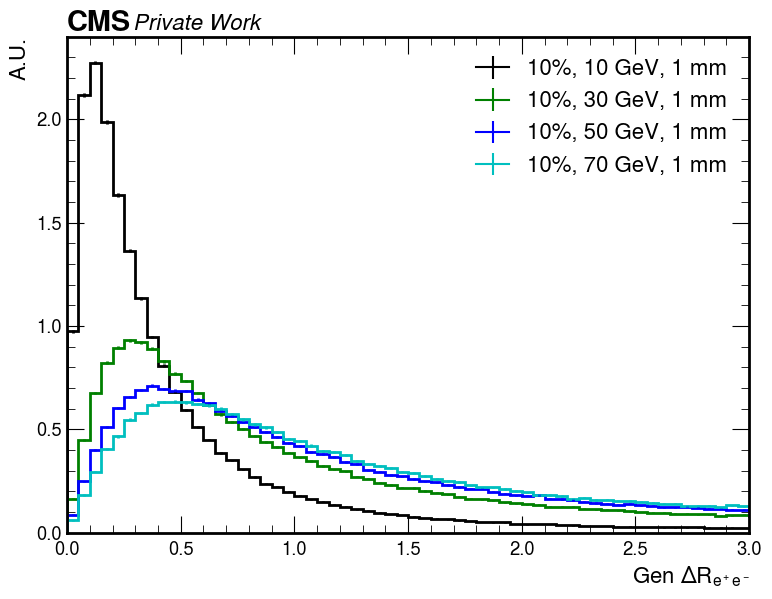

In [9]:
hname = "gen_dR"
outD = "plots/sigOnly/"
xlabel = r"Gen $\Delta R_{e^+e^-}$"
title = None

signals = sigs_delta10_ct1
labels = labels_delta10_ct1
outName = "sigs_gendR_delta10"

ptools.plot_samples_sigBkg(hcs,None,hname,selection,signals,labels,outName,outD,
                           xlabel=xlabel,ylabel=None,title=title,xlim=[0,3],ylim=None,
                           ncol_leg=1,figsize=None,logy=False,logx=False,rebin=1j,
                           save=True,show=True,density=True,yerr=True,histtype='step',legend_loc='best',
                           legend_fontsize=16,bkgOnly=False,sigOnly=True)
hep.cms.text("Private Work")

(exptext: Custom Text(0.001, 1, 'CMS'),
 expsuffix: Custom Text(0.001, 1.005, 'Private Work'),
 supptext: Custom Text(1.012, 1, ''))

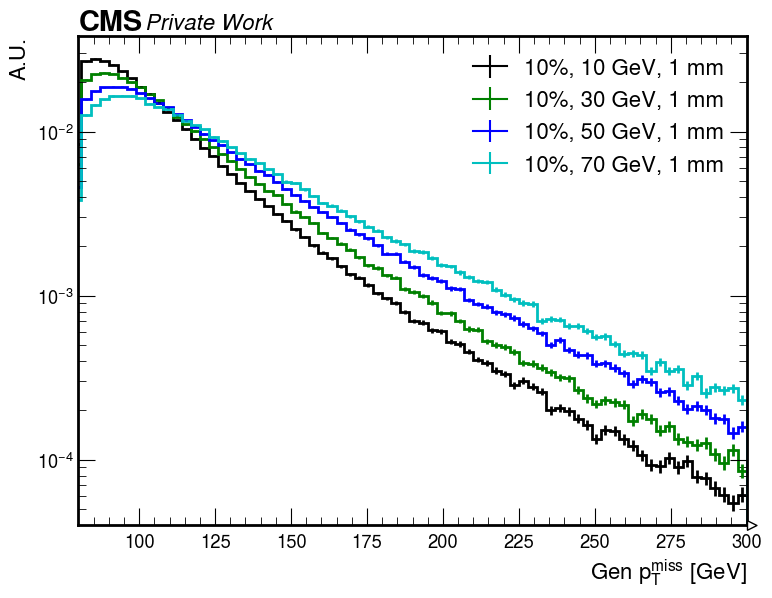

In [13]:
hname = "gen_MET"
outD = "plots/sigOnly/"
xlabel = r"Gen $p_T^\mathrm{miss}$ [GeV]"
title = None
xlim = [80,300]

signals = sigs_delta10_ct1
labels = labels_delta10_ct1
outName = "sigs_genMET_delta10"

ptools.plot_samples_sigBkg(hcs,None,hname,selection,signals,labels,outName,outD,
                           xlabel=xlabel,ylabel=None,title=title,xlim=xlim,ylim=None,
                           ncol_leg=1,figsize=None,logy=True,logx=False,rebin=1j,
                           save=True,show=True,density=True,yerr=True,histtype='step',legend_loc='best',
                           legend_fontsize=16,bkgOnly=False,sigOnly=True)
hep.cms.text("Private Work")

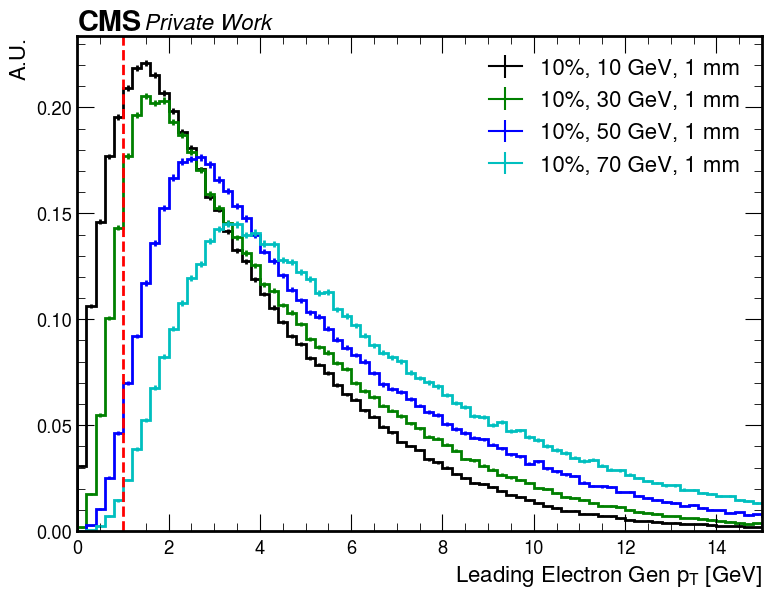

In [24]:
hname = "gen_leadpT"
outD = "plots/sigOnly/"
xlabel = r"Leading Electron Gen $p_T$ [GeV]"
title = None
xlim = [0,15]

signals = sigs_delta10_ct1
labels = labels_delta10_ct1
outName = "sigs_gen_leadpT_delta10"

ptools.plot_samples_sigBkg(hcs,None,hname,selection,signals,labels,outName,outD,
                           xlabel=xlabel,ylabel=None,title=title,xlim=xlim,ylim=None,
                           ncol_leg=1,figsize=None,logy=False,logx=False,rebin=2j,
                           save=True,show=True,density=True,yerr=True,histtype='step',legend_loc='best',
                           legend_fontsize=16,bkgOnly=False,sigOnly=True)
hep.cms.text("Private Work")
plt.axvline(1,linestyle='--',color='red',lw=2)

(exptext: Custom Text(0.0, 1, 'CMS'),
 expsuffix: Custom Text(0.0, 1.005, 'Private Work'),
 supptext: Custom Text(1.012, 1, ''))

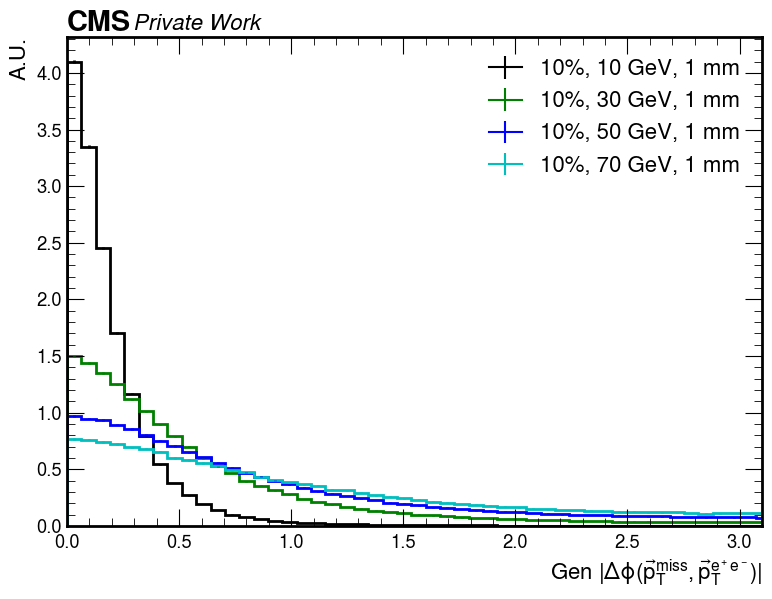

In [38]:
hname = "gen_eeMETdPhi"
outD = "plots/sigOnly/"
xlabel = r"Gen $|\Delta \phi(\vec{p}_T^\mathrm{miss},\vec{p}_{T}^{e^+e^-})|$"
title = None
xlim = [0,3.1]

signals = sigs_delta10_ct1
labels = labels_delta10_ct1
outName = "sigs_gen_eeMETdPhi_delta10"

ptools.plot_samples_sigBkg(hcs,None,hname,selection,signals,labels,outName,outD,
                           xlabel=xlabel,ylabel=None,title=title,xlim=xlim,ylim=None,
                           ncol_leg=1,figsize=None,logy=False,logx=False,rebin=2j,
                           save=True,show=True,density=True,yerr=True,histtype='step',legend_loc='best',
                           legend_fontsize=16,bkgOnly=False,sigOnly=True)
hep.cms.text("Private Work")

(exptext: Custom Text(0.001, 1, 'CMS'),
 expsuffix: Custom Text(0.001, 1.005, 'Private Work'),
 supptext: Custom Text(1.012, 1, ''))

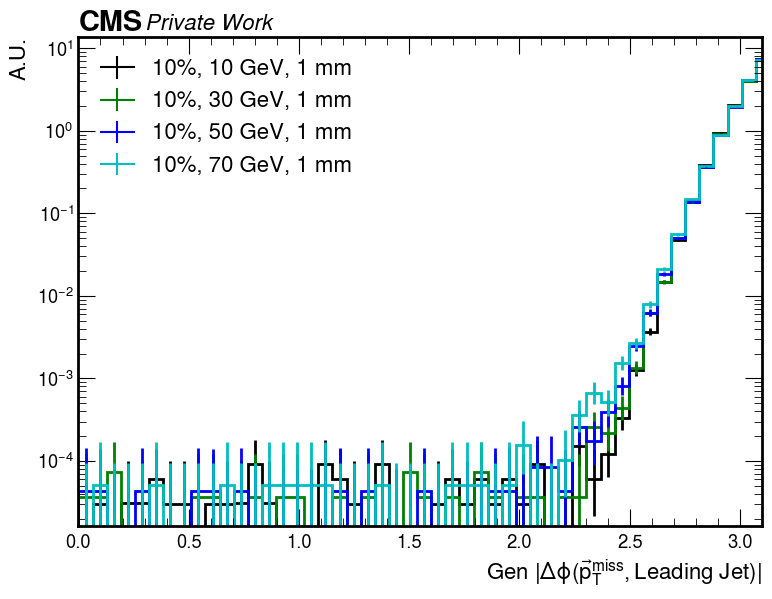

In [39]:
hname = "gen_jetMETdPhi"
outD = "plots/sigOnly/"
xlabel = r"Gen $|\Delta \phi(\vec{p}_T^\mathrm{miss},\text{Leading Jet})|$"
title = None
xlim = [0,3.1]

signals = sigs_delta10_ct1
labels = labels_delta10_ct1
outName = "sigs_gen_jetMETdPhi_delta10"

ptools.plot_samples_sigBkg(hcs,None,hname,selection,signals,labels,outName,outD,
                           xlabel=xlabel,ylabel=None,title=title,xlim=xlim,ylim=None,
                           ncol_leg=1,figsize=None,logy=True,logx=False,rebin=2j,
                           save=True,show=True,density=True,yerr=True,histtype='step',legend_loc='best',
                           legend_fontsize=16,bkgOnly=False,sigOnly=True)
hep.cms.text("Private Work")

(exptext: Custom Text(0.0, 1, 'CMS'),
 expsuffix: Custom Text(0.0, 1.005, 'Private Work'),
 supptext: Custom Text(1.012, 1, ''))

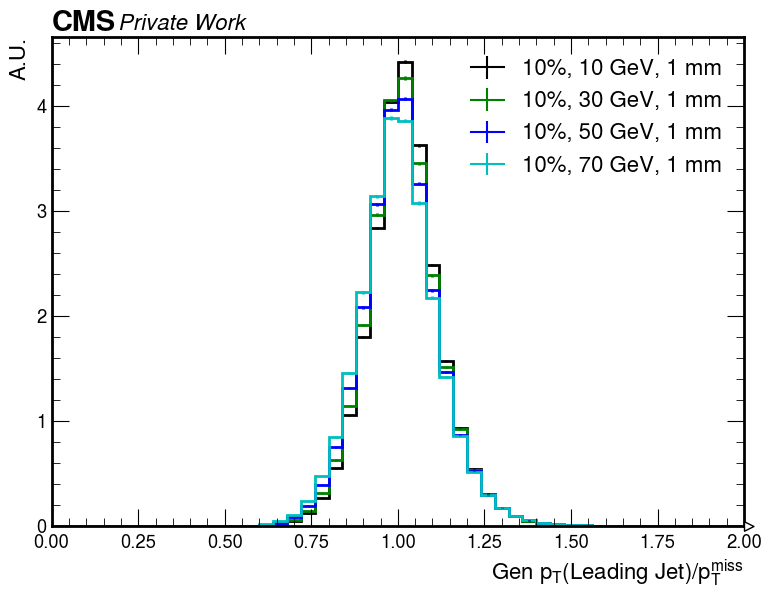

In [40]:
hname = "gen_jetMETratio"
outD = "plots/sigOnly/"
xlabel = r"Gen $p_T(\text{Leading Jet})/p_T^\mathrm{miss}$"
title = None
xlim = [0,2]

signals = sigs_delta10_ct1
labels = labels_delta10_ct1
outName = "sigs_gen_jetMETratio_delta10"

ptools.plot_samples_sigBkg(hcs,None,hname,selection,signals,labels,outName,outD,
                           xlabel=xlabel,ylabel=None,title=title,xlim=xlim,ylim=None,
                           ncol_leg=1,figsize=None,logy=False,logx=False,rebin=2j,
                           save=True,show=True,density=True,yerr=True,histtype='step',legend_loc='best',
                           legend_fontsize=16,bkgOnly=False,sigOnly=True)
hep.cms.text("Private Work")

(exptext: Custom Text(0.0, 1, 'CMS'),
 expsuffix: Custom Text(0.0, 1.005, 'Private Work'),
 supptext: Custom Text(1.012, 1, ''))

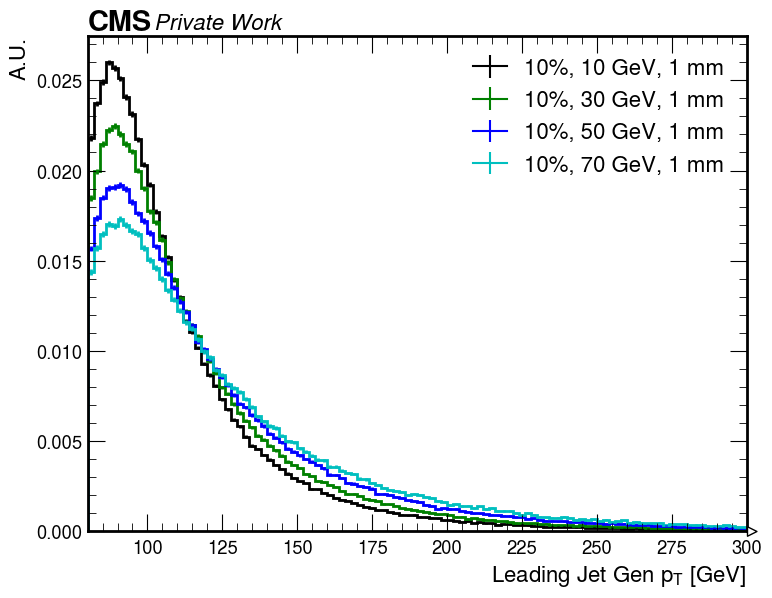

In [41]:
hname = "gen_lead_jet_pt"
outD = "plots/sigOnly/"
xlabel = r"Leading Jet Gen $p_T$ [GeV]"
title = None
xlim = [80,300]

signals = sigs_delta10_ct1
labels = labels_delta10_ct1
outName = "sigs_gen_leadJetPt_delta10"

ptools.plot_samples_sigBkg(hcs,None,hname,selection,signals,labels,outName,outD,
                           xlabel=xlabel,ylabel=None,title=title,xlim=xlim,ylim=None,
                           ncol_leg=1,figsize=None,logy=False,logx=False,rebin=2j,
                           save=True,show=True,density=True,yerr=True,histtype='step',legend_loc='best',
                           legend_fontsize=16,bkgOnly=False,sigOnly=True)
hep.cms.text("Private Work")

(exptext: Custom Text(0.0, 1, 'CMS'),
 expsuffix: Custom Text(0.0, 1.005, 'Private Work'),
 supptext: Custom Text(1.012, 1, ''))

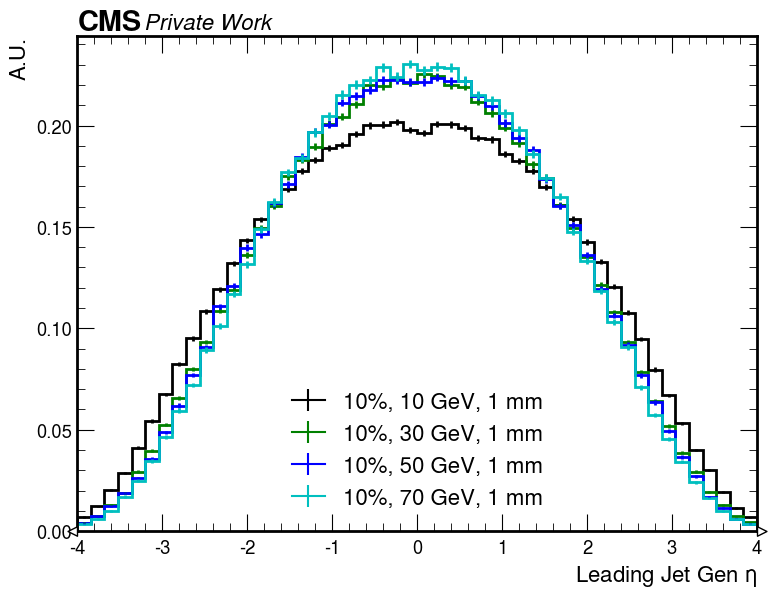

In [45]:
hname = "gen_lead_jet_eta"
outD = "plots/sigOnly/"
xlabel = r"Leading Jet Gen $\eta$"
title = None
xlim = [-4,4]

signals = sigs_delta10_ct1
labels = labels_delta10_ct1
outName = "sigs_gen_leadJetEta_delta10"

ptools.plot_samples_sigBkg(hcs,None,hname,selection,signals,labels,outName,outD,
                           xlabel=xlabel,ylabel=None,title=title,xlim=xlim,ylim=None,
                           ncol_leg=1,figsize=None,logy=False,logx=False,rebin=2j,
                           save=True,show=True,density=True,yerr=True,histtype='step',legend_loc='best',
                           legend_fontsize=16,bkgOnly=False,sigOnly=True)
hep.cms.text("Private Work")

# 20% Splitting

(exptext: Custom Text(0.0, 1, 'CMS'),
 expsuffix: Custom Text(0.0, 1.005, 'Private Work'),
 supptext: Custom Text(1.012, 1, ''))

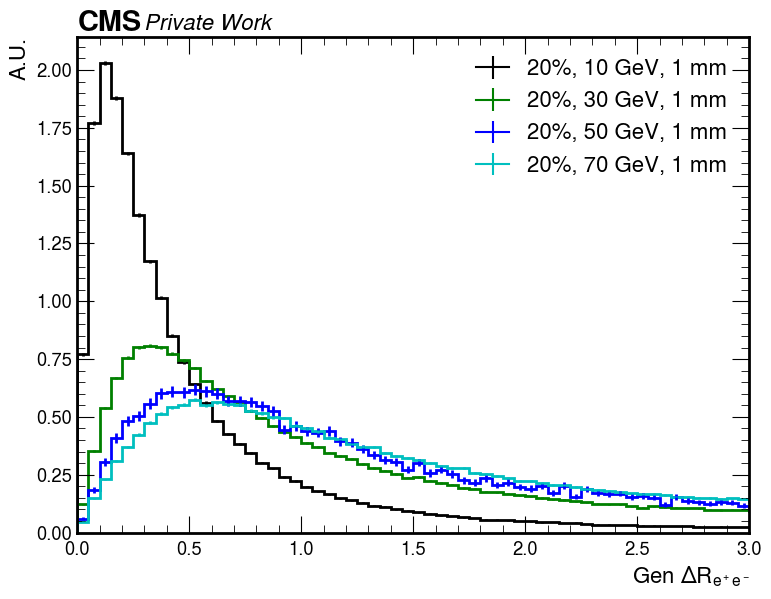

In [46]:
hname = "gen_dR"
outD = "plots/sigOnly/"
xlabel = r"Gen $\Delta R_{e^+e^-}$"
title = None

signals = sigs_delta20_ct1
labels = labels_delta20_ct1
outName = "sigs_gendR_delta20"

ptools.plot_samples_sigBkg(hcs,None,hname,selection,signals,labels,outName,outD,
                           xlabel=xlabel,ylabel=None,title=title,xlim=[0,3],ylim=None,
                           ncol_leg=1,figsize=None,logy=False,logx=False,rebin=1j,
                           save=True,show=True,density=True,yerr=True,histtype='step',legend_loc='best',
                           legend_fontsize=16,bkgOnly=False,sigOnly=True)
hep.cms.text("Private Work")

(exptext: Custom Text(0.001, 1, 'CMS'),
 expsuffix: Custom Text(0.001, 1.005, 'Private Work'),
 supptext: Custom Text(1.012, 1, ''))

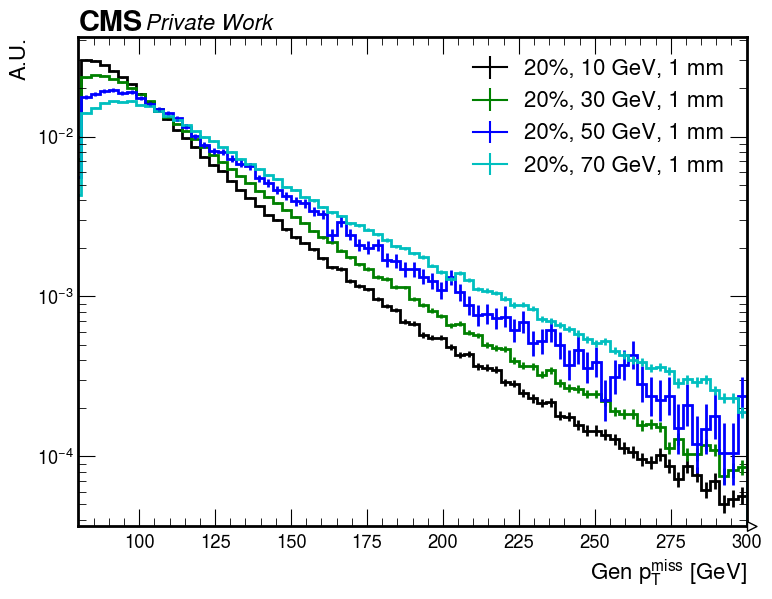

In [47]:
hname = "gen_MET"
outD = "plots/sigOnly/"
xlabel = r"Gen $p_T^\mathrm{miss}$ [GeV]"
title = None
xlim = [80,300]

signals = sigs_delta20_ct1
labels = labels_delta20_ct1
outName = "sigs_genMET_delta20"

ptools.plot_samples_sigBkg(hcs,None,hname,selection,signals,labels,outName,outD,
                           xlabel=xlabel,ylabel=None,title=title,xlim=xlim,ylim=None,
                           ncol_leg=1,figsize=None,logy=True,logx=False,rebin=1j,
                           save=True,show=True,density=True,yerr=True,histtype='step',legend_loc='best',
                           legend_fontsize=16,bkgOnly=False,sigOnly=True)
hep.cms.text("Private Work")

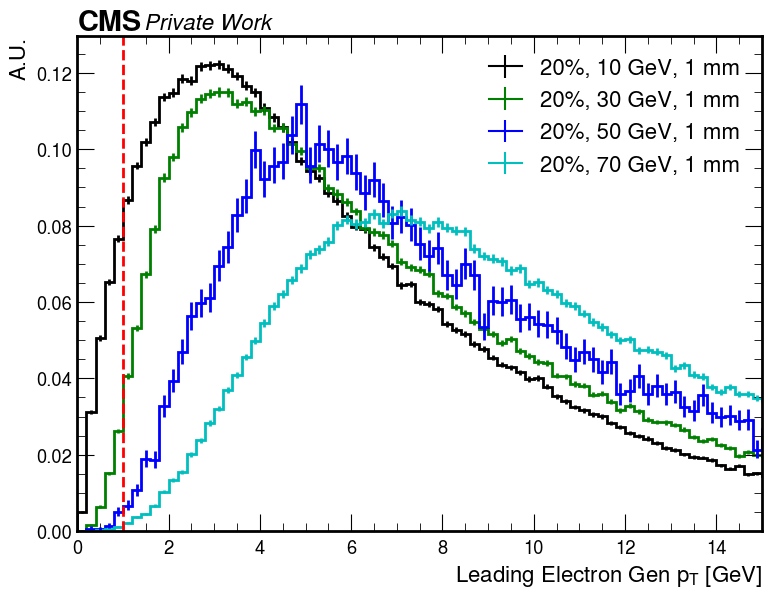

In [48]:
hname = "gen_leadpT"
outD = "plots/sigOnly/"
xlabel = r"Leading Electron Gen $p_T$ [GeV]"
title = None
xlim = [0,15]

signals = sigs_delta20_ct1
labels = labels_delta20_ct1
outName = "sigs_gen_leadpT_delta20"

ptools.plot_samples_sigBkg(hcs,None,hname,selection,signals,labels,outName,outD,
                           xlabel=xlabel,ylabel=None,title=title,xlim=xlim,ylim=None,
                           ncol_leg=1,figsize=None,logy=False,logx=False,rebin=2j,
                           save=True,show=True,density=True,yerr=True,histtype='step',legend_loc='best',
                           legend_fontsize=16,bkgOnly=False,sigOnly=True)
hep.cms.text("Private Work")
plt.axvline(1,linestyle='--',color='red',lw=2)

(exptext: Custom Text(0.0, 1, 'CMS'),
 expsuffix: Custom Text(0.0, 1.005, 'Private Work'),
 supptext: Custom Text(1.012, 1, ''))

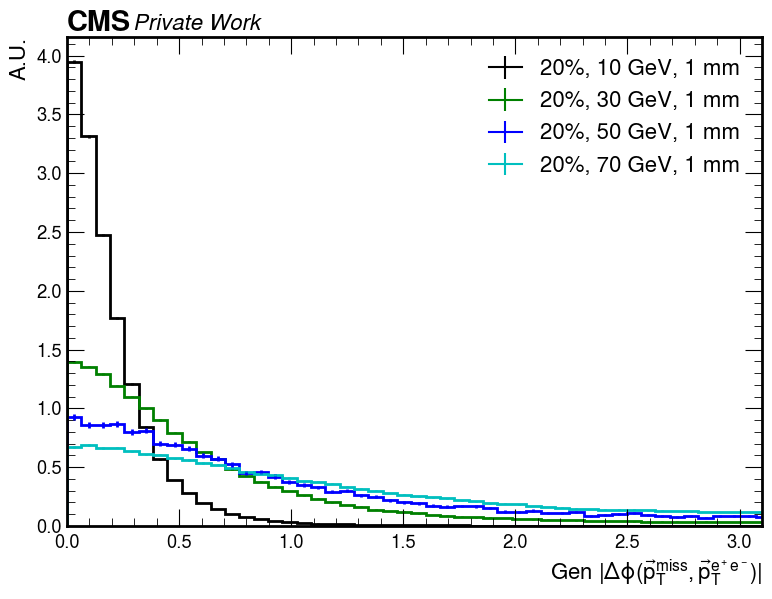

In [49]:
hname = "gen_eeMETdPhi"
outD = "plots/sigOnly/"
xlabel = r"Gen $|\Delta \phi(\vec{p}_T^\mathrm{miss},\vec{p}_{T}^{e^+e^-})|$"
title = None
xlim = [0,3.1]

signals = sigs_delta20_ct1
labels = labels_delta20_ct1
outName = "sigs_gen_eeMETdPhi_delta20"

ptools.plot_samples_sigBkg(hcs,None,hname,selection,signals,labels,outName,outD,
                           xlabel=xlabel,ylabel=None,title=title,xlim=xlim,ylim=None,
                           ncol_leg=1,figsize=None,logy=False,logx=False,rebin=2j,
                           save=True,show=True,density=True,yerr=True,histtype='step',legend_loc='best',
                           legend_fontsize=16,bkgOnly=False,sigOnly=True)
hep.cms.text("Private Work")

(exptext: Custom Text(0.001, 1, 'CMS'),
 expsuffix: Custom Text(0.001, 1.005, 'Private Work'),
 supptext: Custom Text(1.012, 1, ''))

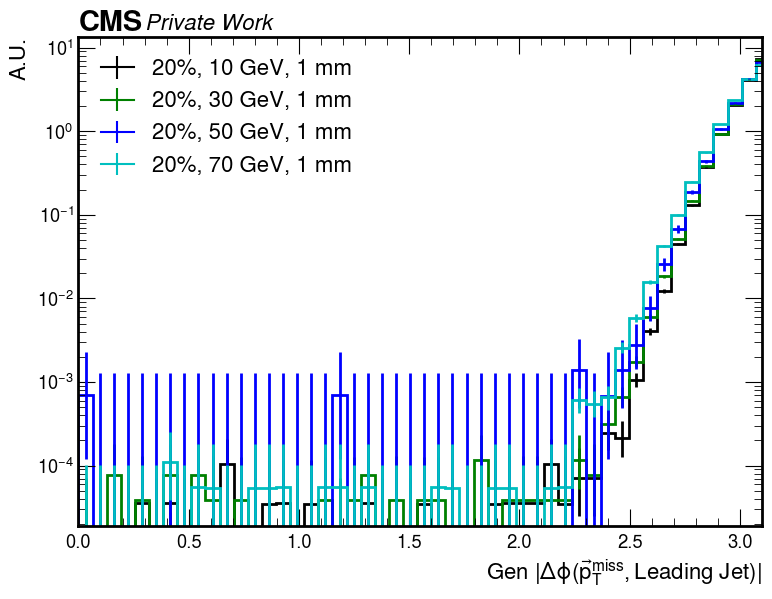

In [50]:
hname = "gen_jetMETdPhi"
outD = "plots/sigOnly/"
xlabel = r"Gen $|\Delta \phi(\vec{p}_T^\mathrm{miss},\text{Leading Jet})|$"
title = None
xlim = [0,3.1]

signals = sigs_delta20_ct1
labels = labels_delta20_ct1
outName = "sigs_gen_jetMETdPhi_delta20"

ptools.plot_samples_sigBkg(hcs,None,hname,selection,signals,labels,outName,outD,
                           xlabel=xlabel,ylabel=None,title=title,xlim=xlim,ylim=None,
                           ncol_leg=1,figsize=None,logy=True,logx=False,rebin=2j,
                           save=True,show=True,density=True,yerr=True,histtype='step',legend_loc='best',
                           legend_fontsize=16,bkgOnly=False,sigOnly=True)
hep.cms.text("Private Work")

(exptext: Custom Text(0.0, 1, 'CMS'),
 expsuffix: Custom Text(0.0, 1.005, 'Private Work'),
 supptext: Custom Text(1.012, 1, ''))

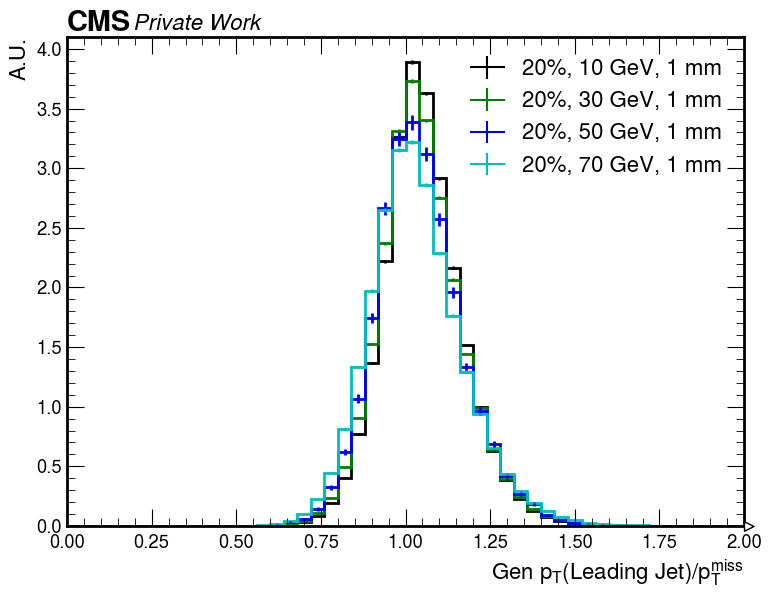

In [51]:
hname = "gen_jetMETratio"
outD = "plots/sigOnly/"
xlabel = r"Gen $p_T(\text{Leading Jet})/p_T^\mathrm{miss}$"
title = None
xlim = [0,2]

signals = sigs_delta20_ct1
labels = labels_delta20_ct1
outName = "sigs_gen_jetMETratio_delta20"

ptools.plot_samples_sigBkg(hcs,None,hname,selection,signals,labels,outName,outD,
                           xlabel=xlabel,ylabel=None,title=title,xlim=xlim,ylim=None,
                           ncol_leg=1,figsize=None,logy=False,logx=False,rebin=2j,
                           save=True,show=True,density=True,yerr=True,histtype='step',legend_loc='best',
                           legend_fontsize=16,bkgOnly=False,sigOnly=True)
hep.cms.text("Private Work")

(exptext: Custom Text(0.0, 1, 'CMS'),
 expsuffix: Custom Text(0.0, 1.005, 'Private Work'),
 supptext: Custom Text(1.012, 1, ''))

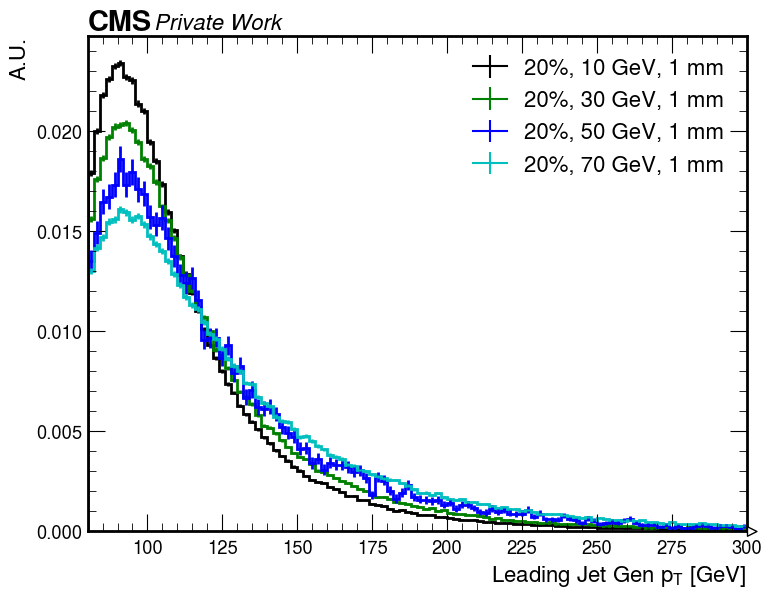

In [52]:
hname = "gen_lead_jet_pt"
outD = "plots/sigOnly/"
xlabel = r"Leading Jet Gen $p_T$ [GeV]"
title = None
xlim = [80,300]

signals = sigs_delta20_ct1
labels = labels_delta20_ct1
outName = "sigs_gen_leadJetPt_delta20"

ptools.plot_samples_sigBkg(hcs,None,hname,selection,signals,labels,outName,outD,
                           xlabel=xlabel,ylabel=None,title=title,xlim=xlim,ylim=None,
                           ncol_leg=1,figsize=None,logy=False,logx=False,rebin=2j,
                           save=True,show=True,density=True,yerr=True,histtype='step',legend_loc='best',
                           legend_fontsize=16,bkgOnly=False,sigOnly=True)
hep.cms.text("Private Work")

(exptext: Custom Text(0.0, 1, 'CMS'),
 expsuffix: Custom Text(0.0, 1.005, 'Private Work'),
 supptext: Custom Text(1.012, 1, ''))

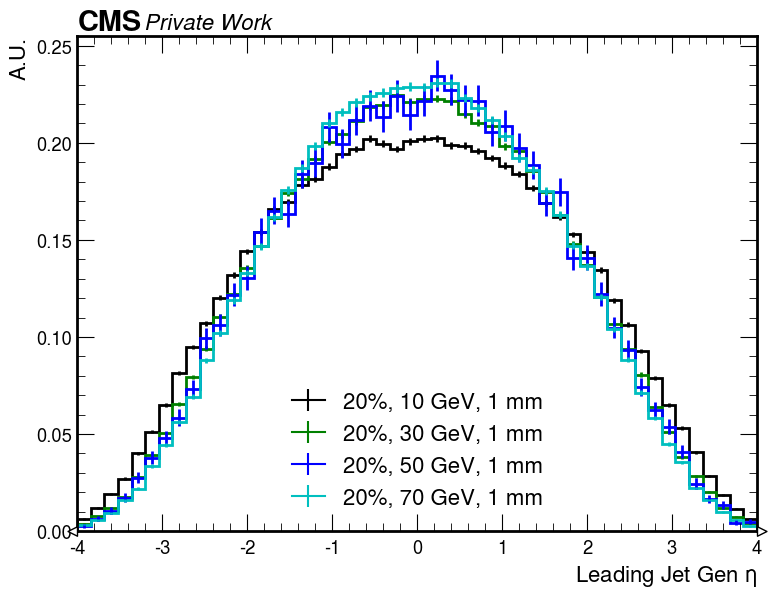

In [53]:
hname = "gen_lead_jet_eta"
outD = "plots/sigOnly/"
xlabel = r"Leading Jet Gen $\eta$"
title = None
xlim = [-4,4]

signals = sigs_delta20_ct1
labels = labels_delta20_ct1
outName = "sigs_gen_leadJetEta_delta20"

ptools.plot_samples_sigBkg(hcs,None,hname,selection,signals,labels,outName,outD,
                           xlabel=xlabel,ylabel=None,title=title,xlim=xlim,ylim=None,
                           ncol_leg=1,figsize=None,logy=False,logx=False,rebin=2j,
                           save=True,show=True,density=True,yerr=True,histtype='step',legend_loc='best',
                           legend_fontsize=16,bkgOnly=False,sigOnly=True)
hep.cms.text("Private Work")

# $v_{xy}$ Plots

In [6]:
sigs_ctaus = ['sig_2018_Mchi-10p5_dMchi-1p0_ctau-1',
              'sig_2018_Mchi-10p5_dMchi-1p0_ctau-10',
              'sig_2018_Mchi-10p5_dMchi-1p0_ctau-100']
labels_ctaus = [dfs[dfs.name==s].legend.item() for s in sigs_ctaus]

(exptext: Custom Text(0.0, 1, 'CMS'),
 expsuffix: Custom Text(0.0, 1.005, 'Private Work'),
 supptext: Custom Text(1.012, 1, ''))

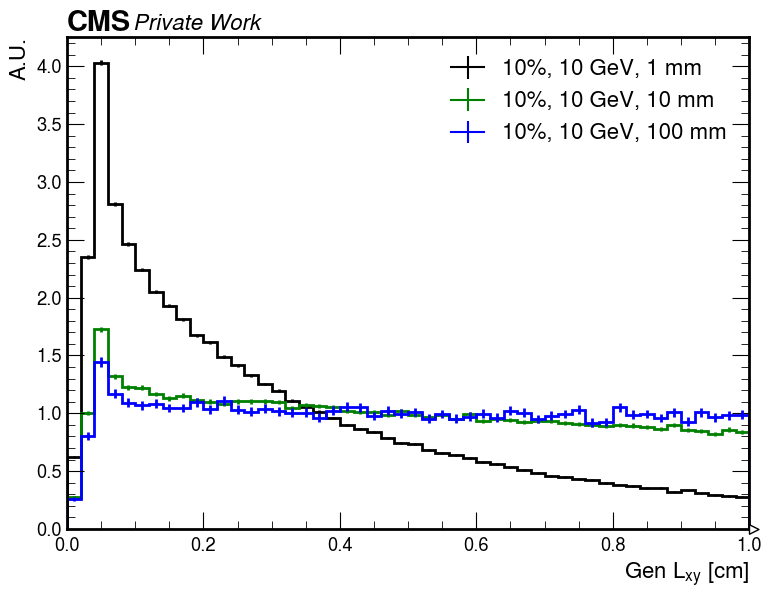

In [9]:
hname = "gen_vxy1"
outD = "plots/sigOnly/"
xlabel = r"Gen $L_{xy}$ [cm]"
title = None
xlim = [0,1]

signals = sigs_ctaus
labels = labels_ctaus
outName = "sigs_ctaus_genVxy1"

ptools.plot_samples_sigBkg(hcs,None,hname,selection,signals,labels,outName,outD,
                           xlabel=xlabel,ylabel=None,title=title,xlim=xlim,ylim=None,
                           ncol_leg=1,figsize=None,logy=False,logx=False,rebin=2j,
                           save=True,show=True,density=True,yerr=True,histtype='step',legend_loc='best',
                           legend_fontsize=16,bkgOnly=False,sigOnly=True)
hep.cms.text("Private Work")

(exptext: Custom Text(0.001, 1, 'CMS'),
 expsuffix: Custom Text(0.001, 1.005, 'Private Work'),
 supptext: Custom Text(1.012, 1, ''))

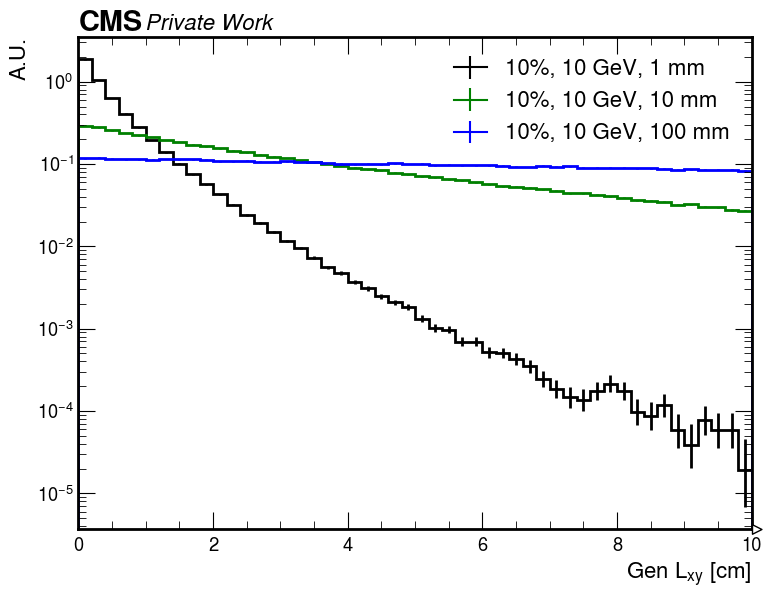

In [11]:
hname = "gen_vxy10"
outD = "plots/sigOnly/"
xlabel = r"Gen $L_{xy}$ [cm]"
title = None
xlim = [0,10]

signals = sigs_ctaus
labels = labels_ctaus
outName = "sigs_ctaus_genVxy10"

ptools.plot_samples_sigBkg(hcs,None,hname,selection,signals,labels,outName,outD,
                           xlabel=xlabel,ylabel=None,title=title,xlim=xlim,ylim=None,
                           ncol_leg=1,figsize=None,logy=True,logx=False,rebin=2j,
                           save=True,show=True,density=True,yerr=True,histtype='step',legend_loc='best',
                           legend_fontsize=16,bkgOnly=False,sigOnly=True)
hep.cms.text("Private Work")

(exptext: Custom Text(0.001, 1, 'CMS'),
 expsuffix: Custom Text(0.001, 1.005, 'Private Work'),
 supptext: Custom Text(1.012, 1, ''))

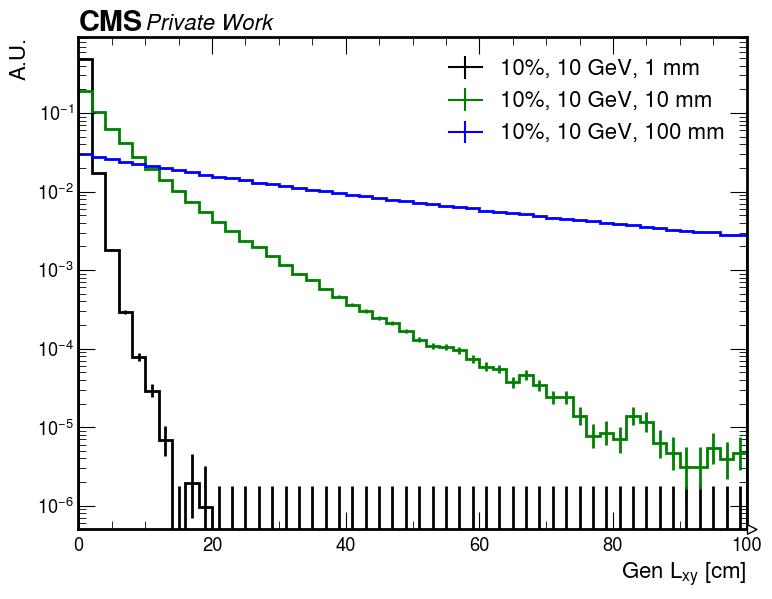

In [12]:
hname = "gen_vxy100"
outD = "plots/sigOnly/"
xlabel = r"Gen $L_{xy}$ [cm]"
title = None
xlim = [0,100]

signals = sigs_ctaus
labels = labels_ctaus
outName = "sigs_ctaus_genVxy100"

ptools.plot_samples_sigBkg(hcs,None,hname,selection,signals,labels,outName,outD,
                           xlabel=xlabel,ylabel=None,title=title,xlim=xlim,ylim=None,
                           ncol_leg=1,figsize=None,logy=True,logx=False,rebin=2j,
                           save=True,show=True,density=True,yerr=True,histtype='step',legend_loc='best',
                           legend_fontsize=16,bkgOnly=False,sigOnly=True)
hep.cms.text("Private Work")